In [1]:
import os

import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
reports_data = pd.read_csv('../data/clean/mozilla_bug_report_data.csv')

In [3]:
reports_data.head()

,long_description,severity_code
0,is broken many users can t enter bugs on it p...,4
1,adding support for custom headers and cookie n...,4
2,the patch in bug regressed the fix from bug th...,2
3,from bugzilla helper user agent mozilla x u li...,2
4,i found it odd that relogin cgi didn t clear o...,1


In [4]:
reports_data.shape

(2388, 2)

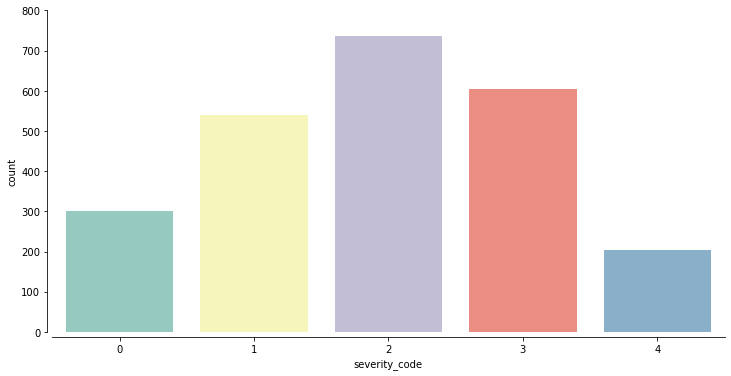

In [5]:
ax=sns.catplot(data=reports_data
              , x="severity_code"
              , height=5
              , aspect=2
              , kind="count"
              , palette="Set3")
sns.despine(offset=5)

ax.set(ylim=(0, 800))

In [25]:
def plot_word_cloud(severities, max_len=64):
    fig, axs = plt.subplots(nrows=1, ncols=len(severities), figsize=(20, 20))
    stopwords = set(STOPWORDS)
    for ax, severity in zip(axs, severities):
        filtered = reports_data.loc[reports_data['severity_code']==severity]
        descriptions = filtered['long_description'].apply((lambda s: ' '.join(s.split()[:max_len])))
        descriptions = " ".join(
            description for description in descriptions
        )
        wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=max_len
                              , background_color="white").generate(descriptions)
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(severity)
        ax.grid(False)

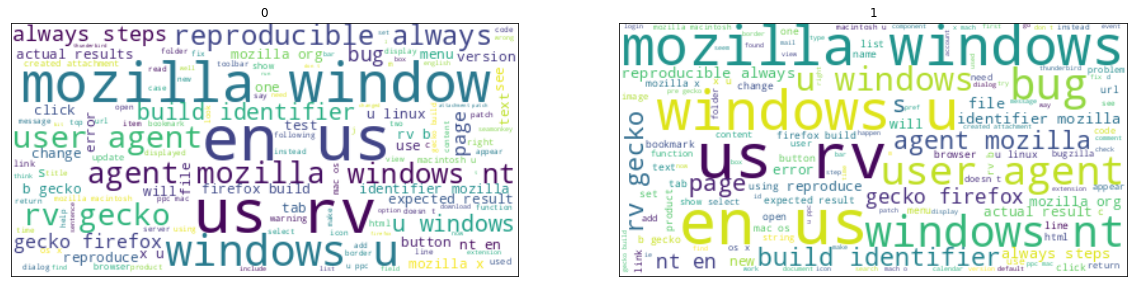

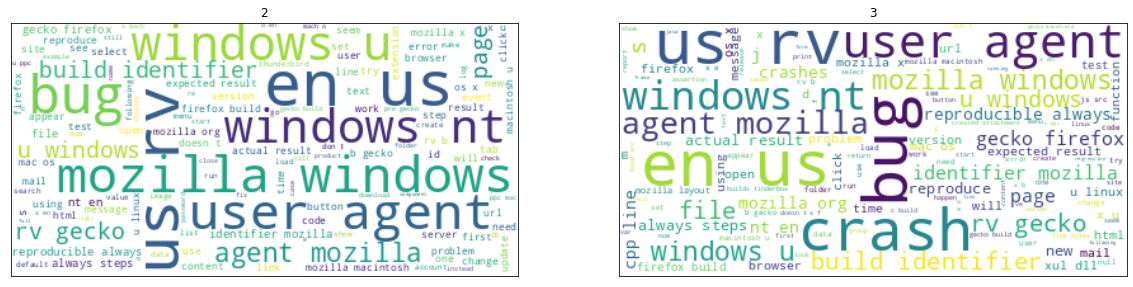

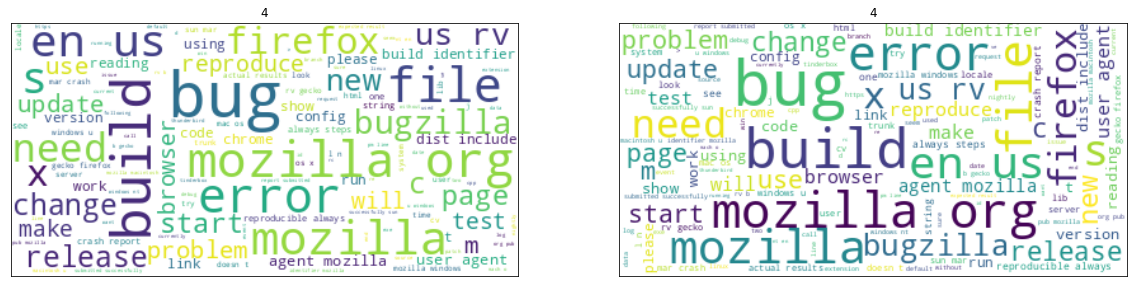

In [27]:
plot_word_cloud([0, 1], 128)
plot_word_cloud([2, 3], 128)
plot_word_cloud([4, 4], 128)